# Exploratory Data Analysis (EDA) and Visualization

## Introducion
In this notebook, we will perform Exploratory Data Analysis (EDA) on the Titanic dataset. It helps us understand the structure, patterns, and anomalies in the data, and it guides us in selecting the right preprocessing and modeling techniques.


In [1]:
#Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Previewing Titanic Dataset

In [2]:
#Dataset is loaded from a csv file into pandas dataframe 
df= pd.read_csv('Titanic-Dataset.csv')

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Data Cleaning
### Checking and Visualizing missing values
### Handling missing values
### Checking and Removing Duplicates
### Checking and Treating Outliers

In [5]:
print(df.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

<Axes: >

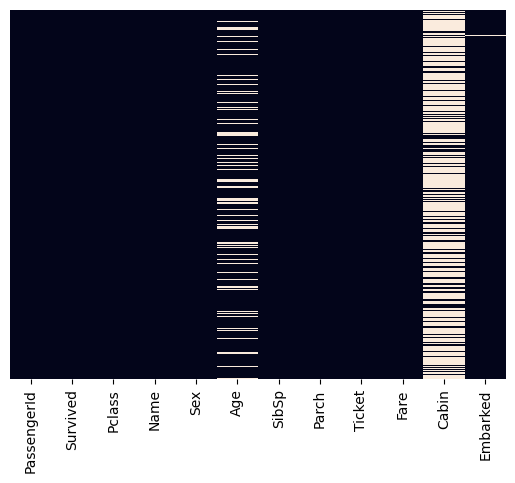

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
#Dropping cabin column 
df.drop(columns=['Cabin'],inplace=True)

<Axes: >

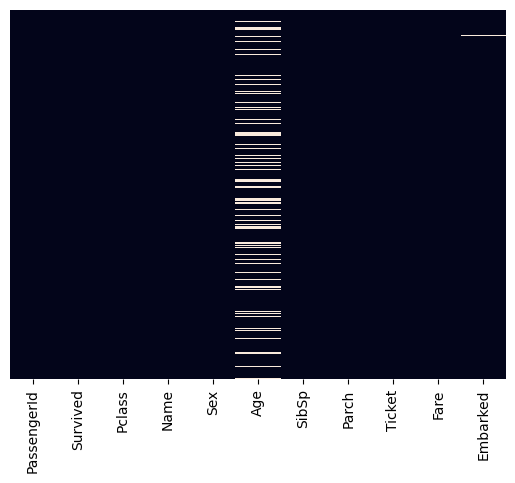

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
#Missing values are imputed
df['Age'].fillna(df['Age'].median(),inplace=True)

<Axes: >

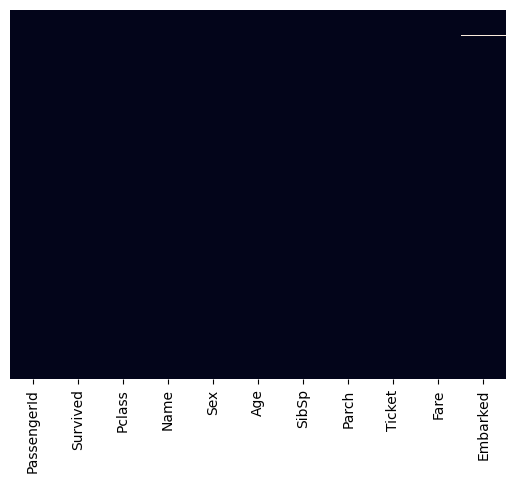

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<Axes: >

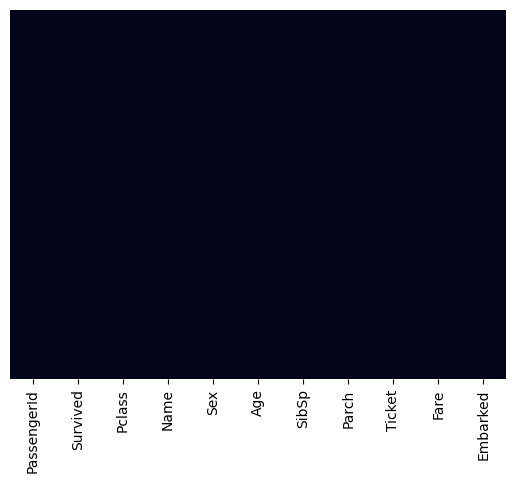

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
#Removing duplicates
print(df.duplicated().sum())

0


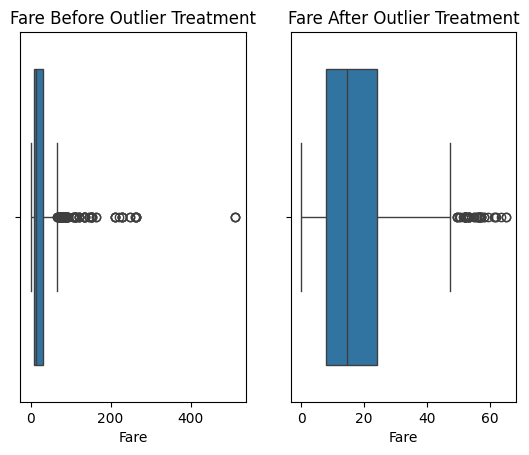

In [14]:
#Treating outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_val = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_val, df[column])
    return df

    plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Fare'])
plt.title('Fare Before Outlier Treatment')

titanic = cap_outliers(df, 'Fare')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Fare After Outlier Treatment')
plt.show()

## Categorical Variables Visualization using Bar Charts

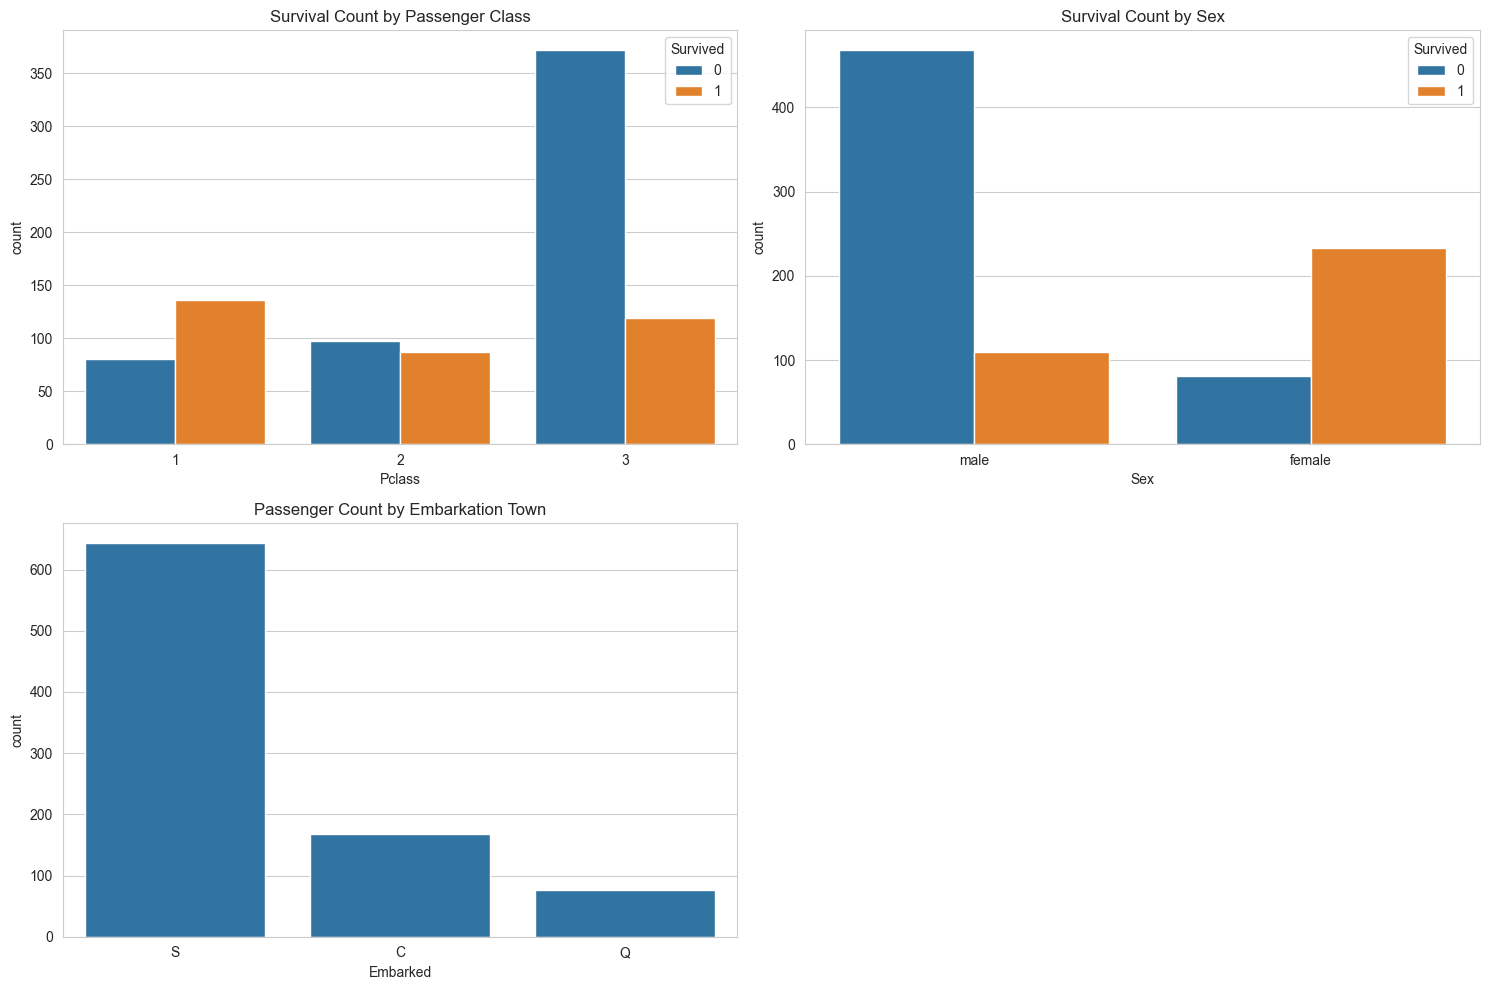

In [35]:
#Categorical variables visulaizations(bar charts)
sns.set_style('whitegrid')
df['Status'] = df['Survived'].map({0: 'Dead', 1: 'Survived'})
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')

plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')

plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', data=df)
plt.title('Passenger Count by Embarkation Town')
plt.tight_layout()
plt.show()

##  Histogram For Numeric Distribution

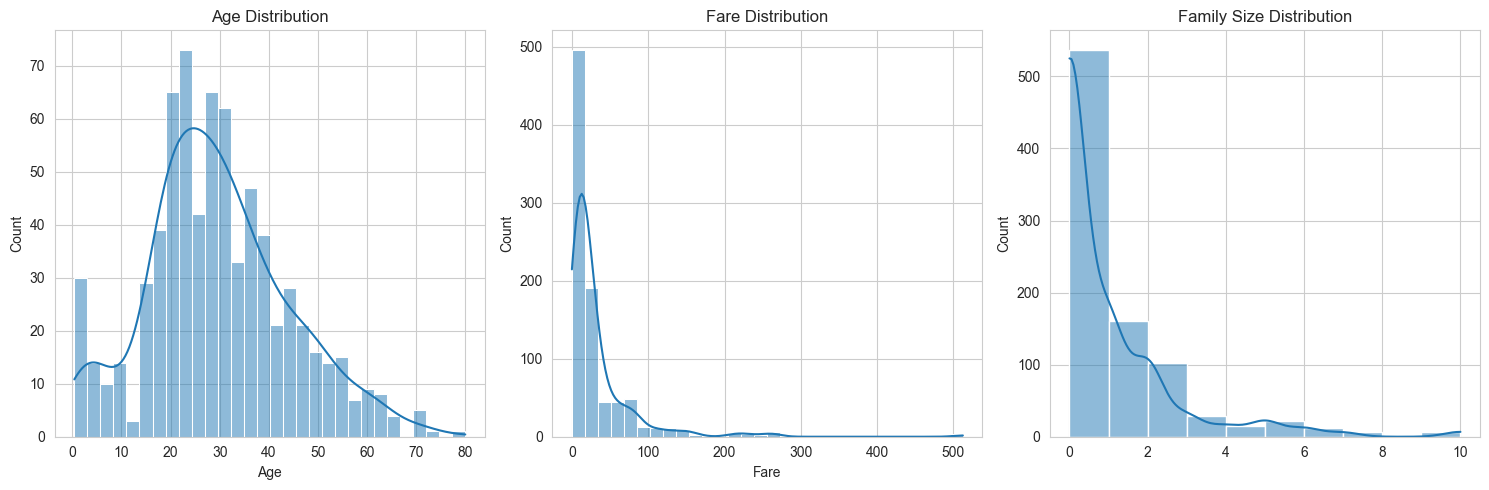

In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['SibSp'] + df['Parch'], bins=10, kde=True)
plt.title('Family Size Distribution')

plt.tight_layout()
plt.show()

## Correlation Heatmap for Numeric Features

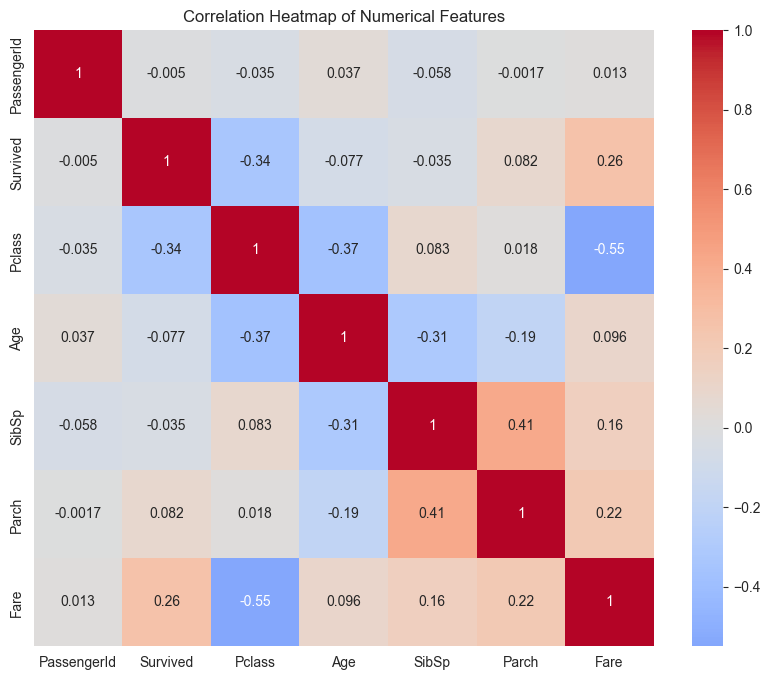

In [37]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Key Findings:
### Demographics:
- Most passengers were in their 20s and 30s
- About 65% were male, 35% female
- Majority were in 3rd class (55%), followed by 1st (25%) and 2nd (20%)
### Survival Rates:
- Overall survival rate was 38%
- Significant class bias: 1st class had 63% survival vs 24% in 3rd class
- Strong gender bias: 74% of females survived vs only 19% of males
- Children had higher survival rates than adults
### Fare and Class:
- Higher fares correlated with better survival (as they represent higher classes)
- After outlier treatment, most fares were between £0-50
### Family Relationships:
- About 60% traveled alone
- Those with 1-3 family members had slightly better survival rates
- Very large families (4+ members) had lower survival rates
### Embarkation Port:
- Most passengers embarked from Southampton (72%)
- Cherbourg passengers had higher survival rates (possibly due to more 1st class passengers)
### Interesting Observations:
- The "women and children first" policy is evident in the data
- Class played a significant role in survival, beyond just location on the ship
- While age alone didn't show strong correlation with survival, when combined with sex it becomes significant
- Single travelers had lower survival rates than those with small families
